## 86 - Re-sampling, Interpolation, and Frequency Domain Analysis


[Youtube](https://www.youtube.com/watch?v=bhtLbN62DL4)

[Download OK ASOS data](https://mesonet.agron.iastate.edu/request/download.phtml?network=OK_ASOS)

Select Network: Oklahoma ASOS

1) Selected Stations: [OUN] NORMAN/WESTHEIMER

2) Select From Available Data: Air Temperature[C]

3) Specific Date Range (If needed):
Start Date: 2012 January 1
End Date: 2019 January 1

4) Timezone of Observation Times: Coordinated Universal Time (UTC)

5) Download Options:
Data Format: Comma Delimited
Include Latitude + Longitude: No
How to represent missing data: Use 'M'
How to represent Trace reports: Use 'T'

Save result data to file on computer

6) Limit Report Types: Routine + Specials

7) Get Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# df = pd.read_csv('OUN.txt')
df = pd.read_csv('OUN.txt', na_values = 'M', index_col = 'valid', parse_dates = True)
df.head()

,station,tmpc
valid,,
2012-01-01 00:15:00,OUN,18.0
2012-01-01 00:35:00,OUN,17.0
2012-01-01 00:55:00,OUN,16.0
2012-01-01 01:15:00,OUN,16.0
2012-01-01 01:35:00,OUN,15.0


In [3]:
len(df)

130001

In [4]:
df = df.dropna()

In [5]:
len(df)

129965

In [6]:
df_resampled = df.resample('15T')

In [7]:
len(df_resampled)

177762

In [8]:
df_resampled = df_resampled.interpolate(method = 'linear')
df_resampled.head()

,station,tmpc
valid,,
2012-01-01 00:15:00,OUN,18.0
2012-01-01 00:30:00,NaN,17.5
2012-01-01 00:45:00,NaN,17.0
2012-01-01 01:00:00,NaN,16.5
2012-01-01 01:15:00,OUN,16.0


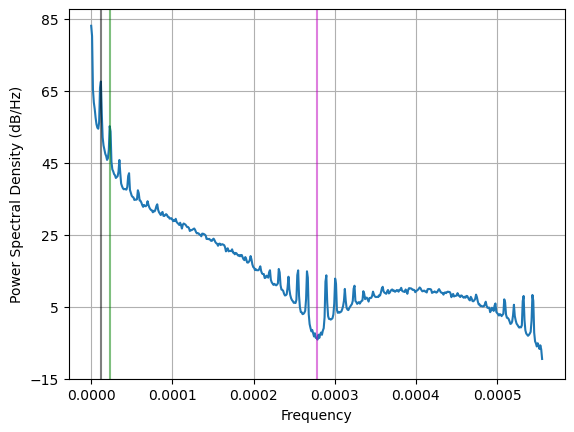

In [9]:
_ = plt.psd(df_resampled['tmpc'], Fs = 1/900, NFFT = 2**10)
plt.axvline(x = 1 / 86400, color = 'k', alpha = 0.5)
plt.axvline(x = 1 / 43200, color = 'g', alpha = 0.5)
plt.axvline(x = 1 / 3600, color = 'm', alpha = 0.5)